# Day 19 Random Forest Learning

### Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition by Aurélien Géron 
### Chpt 6: Decision Trees

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import pandas as pd

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
iris = load_iris()
X = iris.data[:,2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [3]:
image_path = Path('../data')

In [4]:
export_graphviz(tree_clf,
                out_file=str(image_path.joinpath('iris_tree.dot')),
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True
               )

In [5]:
#! dot -Tpng {image_path}/iris_tree.dot -o {image_path}/iris_tree.png

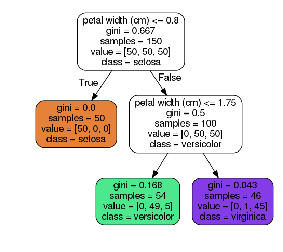

In [6]:
img=mpimg.imread(str(image_path.joinpath('iris_tree.png')))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

Scikit-Learn uses the Classification And Regression Tree (CART) algorithm, which produces only binary trees: nonleaf nodes always have two children (i.e., questions only have yes/no answers). However, other algorithms such as ID3 can produce Decision Trees with nodes that have more than two children.

The idea is really quite simple: the algorithm first splits the training set in two subsets using a single feature k and a threshold tk. The cost function used to produce the pureset subsets. 

The CART algorithm is a greedy algorithm: it greedily searches for an optimum split at the top level, then repeats the process at each level. It does not check whether or not the split will lead to the lowest possible impurity several levels down. A greedy algorithm often produces a reasonably good solution, but it is not guaranteed to be the optimal solution.

To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom during training. As you know by now, this is called regularization. The regularization hyperparameters depend on the algorithm used, but generally you can at least restrict the maximum depth of the Decision Tree. 

### Chapter 7. Ensemble Learning and Random Forests

![](https://cdn-images-1.medium.com/max/1200/1*10t9S7xvWE5Z3NEZrmHG2w.jpeg)

What is an ensemble method?

A way to think about Ensemble learning is Fable of blind men and elephant.

The idea here is to train multiple models, each with the objective to predict or classify a set of results. [Source](https://medium.com/@rrfd/boosting-bagging-and-stacking-ensemble-methods-with-sklearn-and-mlens-a455c0c982de)

The main causes of difference in actual and predicted values are **noise, variance, and bias**.[Source](https://becominghuman.ai/ensemble-learning-bagging-and-boosting-d20f38be9b1e)

If you aggregate the predictions of a group of predictors (such as classifiers or regressors), you will often get better predictions than with the best individual predictor. A group of predictors is called an ensemble; thus, this technique is called Ensemble Learning, and an Ensemble Learning algorithm is called an Ensemble method.

Bagging and Pasting: use the same training algorithm for every predictor, but to train them on different random subsets of the training set. When sampling is performed with replacement, this method is called bagging (short for bootstrap aggregating). When sampling is performed without replacement, it is called pasting.

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mlst_0704.png)

**Understanding Ensemble Methods from Machine Learning and Deep Learning with OpenCV**
Instructor Carol Quadros

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), n_estimators=10)

In [8]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                           n_estimators=10, max_samples=0.5,
                           bootstrap=True, random_state=3)

In [9]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [11]:
bag_knn.fit(X_train, y_train)
bag_knn.score(X_test, y_test)

0.9370629370629371

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.916083916083916

By combining classifiers (bagging and knn) we get a better score of 93.7%. Comparative to knn alone with 91.6%

Random forest is an extension of bagged decision trees.
Samples of the training dataset are taken with replacement, but the trees are constructed in a way that reduces the correlation between individual classifiers. Specifically, rather than greedily choosing the best split point in the construction of the tree, only a random subset of features are considered for each split.[Source](https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/)

It searches for the best feature among a random subset of features. This results in a greater tree diversity, which (once again) trades a higher bias for a lower variance, generally yielding an overall better model.

Another great quality of Random Forests is that they make it easy to measure the relative importance of each feature. 

In [13]:
iris = load_iris()
rnf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnf_clf.fit(iris['data'], iris['target'])
for name, score in zip(iris['feature_names'], rnf_clf.feature_importances_):
    print(name,score)

sepal length (cm) 0.10308553584657547
sepal width (cm) 0.023380449375189547
petal length (cm) 0.45082592037420866
petal width (cm) 0.42270809440402657


It seems that the most important features are the petal length (44%) and width (42%), while sepal length and width are rather unimportant in comparison (11% and 2%, respectively).

Similarly you can this for Random Forest on the MNIST dataset:

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mlst_0706.png)

Consider boosting: AdaBoost (Adaptive) and Gradient Boosting.
Refers to any Ensemble method that can combine several weak learners into a strong learner. The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor. 

This is AdaBoost:

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mlst_0707.png)

Scikit-Learn actually uses a multiclass version of AdaBoost called SAMME

There are three main terms describing the ensemble (combination) of various models into one more effective model:

Bagging to decrease the model’s variance;
Boosting to decreasing the model’s bias, and;
Stacking to increasing the predictive force of the classifier.[Source](https://medium.com/@rrfd/boosting-bagging-and-stacking-ensemble-methods-with-sklearn-and-mlens-a455c0c982de)

**Example from DataCamp** [Source](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)

In [14]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
rnf_clf = RandomForestClassifier(n_estimators=100)
rnf_clf.fit(X_train, y_train)
y_pred = rnf_clf.predict(X_test)

In [16]:
metrics.accuracy_score(y_test, y_pred)

0.9777777777777777

In [17]:
rnf_clf.predict([[1,4,5,2]])

array([2])

Some Kaggle examples:
- [MNIST random forest](https://www.kaggle.com/hideki1234/randomforest-of-tree-and-accuracy )
- Dstl Satellite Imagery Feature Detection: [DSTL machine learning pipeline](https://www.kaggle.com/lopuhin/full-pipeline-demo-poly-pixels-ml-poly) 
- Dstl Satellite Imagery Feature Detection: [Object based solution](https://www.kaggle.com/chriscc/object-based-solution-for-dstl)
- [Forest Cover Type Classification](https://www.kaggle.com/c/forest-cover-type-prediction)

Looking at Google Earth Engine:
- [Image classification](https://developers.google.com/earth-engine/classification)
- [Geohackweek](https://geohackweek.github.io/GoogleEarthEngine/05-classify-imagery/) 

Further watching/reading
- [Machine Learning Algorithms in 7 Days](https://learning.oreilly.com/videos/machine-learning-algorithms/9781789800289?autoplay=false)
- [Ensemble methods for ML](https://blog.statsbot.co/ensemble-learning-d1dcd548e936)
- [Kaggle ensemble guide](https://mlwave.com/kaggle-ensembling-guide/)